1) Tavoite
Tavoitteena on oppia mallintamaan päätöspuun avulla ja validoimaan malli

2) Datan tutkiminen

In [1]:
#!python -m pip install pandas
#!python -m pip install seaborn
#!python -m pip install matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
df.dtypes 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [3]:
df['species'] = df['species'].astype(pd.api.types.CategoricalDtype())
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 5)

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
korrelaatiomatriisi = df.loc[:,'sepal_length':'petal_width'].corr()

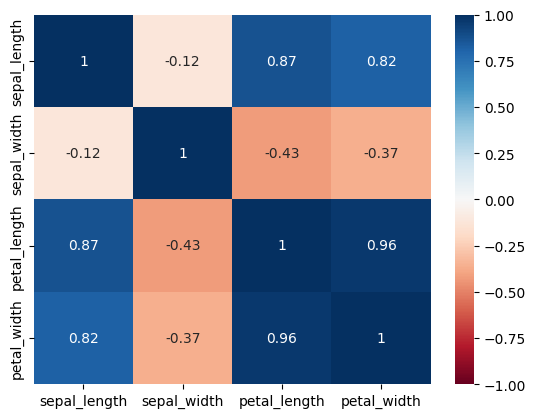

In [8]:
sns.heatmap(korrelaatiomatriisi, vmin = -1.0, vmax = 1.0, cmap = 'RdBu', annot = True)
plt.show()

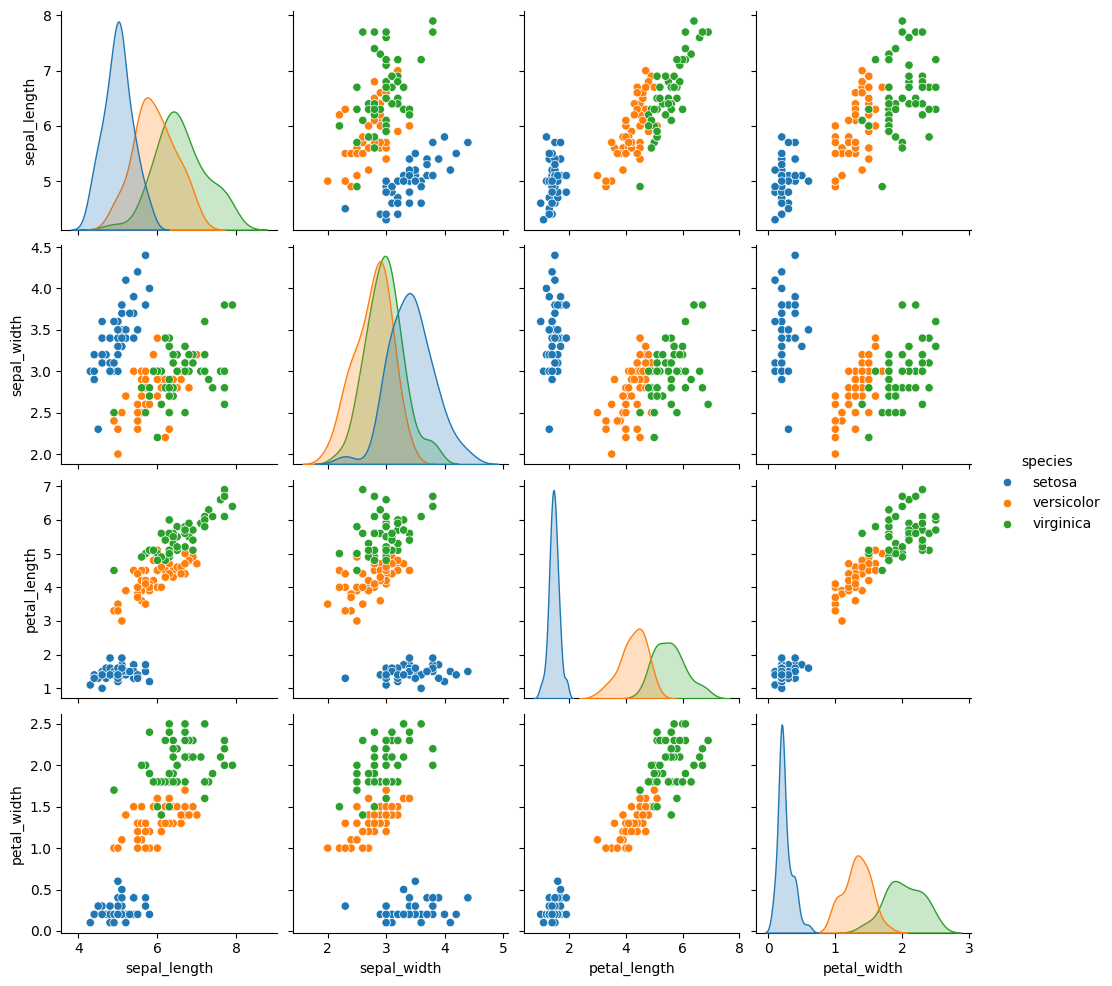

In [9]:
sns.pairplot(df, hue = 'species')
plt.show()

3) DataValmistelu

In [10]:
colnames = df.columns
colnames

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
X = df.loc[:, 'sepal_length':'petal_width']
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
Y_true = df.loc[:, 'species']
Y_true

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

4) Mallinnus

In [13]:
#!python -m pip install scikit-learn
from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth = 3)
classifier.fit(X, Y_true)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
print(tree.export_text(classifier, feature_names=list(colnames[:4])))

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- petal_length >  4.95
|   |   |   |--- class: virginica
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal_length >  4.85
|   |   |   |--- class: virginica



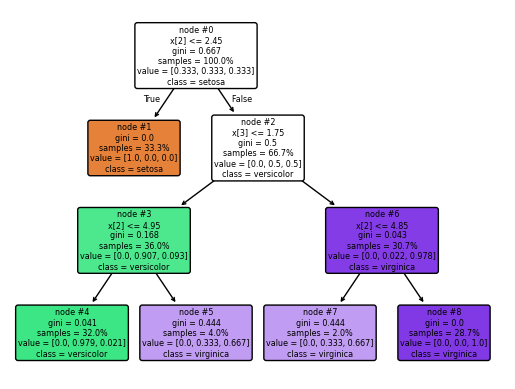

In [15]:
tree.plot_tree(classifier,
               max_depth = 3,
               #feature_names = colnames[:,4],
               class_names = ['setosa','versicolor','virginica'],
               filled = True,
               impurity = True,
               node_ids = True,
               proportion = True,
               rounded = True,
               precision = 3,
               ax = None,
               fontsize = None
               )

plt.show()

5) Arvionti

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#ennuste selittävien muuttujien perusteella
#oikeasti pitäisi tehdä testijoukosta. Tässä sitä ei ole käytetty, koska tietojoukko on niin pieni.
Y_pred = classifier.predict(X)

# sekaannusmatriisi
cm = confusion_matrix(Y_true, Y_pred)
print("Confusion matrix:\n",cm)

#tarkkuus 
accuracy = accuracy_score(Y_true, Y_pred)
print("Accuracy calculated from the training set = %.3f" % (accuracy)) 

#luokitteluraportti
print(classification_report(Y_true, Y_pred, target_names=['setosa', 'versicolor', 'virginica']))

Confusion matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Accuracy calculated from the training set = 0.973
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



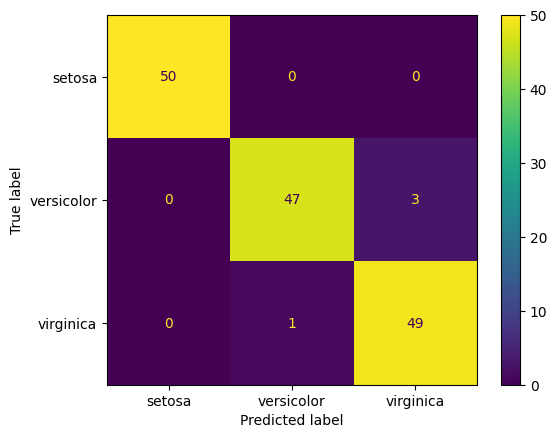

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_true, Y_pred)  #normalize='all'
cmd = ConfusionMatrixDisplay(cm, display_labels=['setosa', 'versicolor', 'virginica'])
cmd.plot()
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

# osien määrä, jaetaan k yhtä suureen osaan
k = 3

#arvioinnin tulos kierroksittain
#kullakin kierroksella lasketaan k-1 osaa mallien opettamiseen, 1 osa mallin testaamiseen
#toistetaan k kertaa, lopuksi otetaan kaikkien k-tulosten keskiarvo
scores = cross_val_score(estimator = classifier,
                         X=X,
                         Y=Y_true,
                         scoring="accuracy",
                         cv=k)

print("Accuracies from %d individual folds:" % k)
print('scores', scores)

# kierrosten keskiarvo
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

TypeError: got an unexpected keyword argument 'Y'

Ristiinvalidointi

In [ ]:
from sklearn.model_selection import cross_val_score

k = 5
scores = cross_val_score(estimator = classifier,
                         X = X,
                         y = Y_true,
                        scoring = 'accuracy',
                        cv = k)

print(k)
print(scores)
print(scores.means())

TypeError: got an unexpected keyword argument 'Y'